In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Load DataSet
df = pd.read_csv('FeatureExtractionParameters.csv', delimiter=';')

# Drop unneccesary columns
columns_to_drop = ['FileName', 'Beat', 'PatientAge', 'Gender']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

# Merge Ryhtm Column
""" 
    AFIB: AF, AFIB
    GSVT: SVT, AT, SAAWR, ST, AVNRT, AVRT
    SR: SA, SR
    SB: Others
"""
df['MergedRhythm'] = np.where(df['Rhythm'].isin(['AF', 'AFIB']), 'AFIB',
                               np.where(df['Rhythm'].isin(['SVT', 'AT', 'SAAWR', 'ST', 'AVNRT', 'AVRT']), 'GSVT',
                                        np.where(df['Rhythm'].isin(['SA', 'SR']), 'SR', 'SB')))


X = df.drop(columns=['Rhythm', 'MergedRhythm']).values
y = df['MergedRhythm'].values

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)

# Train Model
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)



In [2]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 84.32%


In [7]:
# Confusion Matrix
# print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

        AFIB       0.75      0.56      0.64       422
        GSVT       0.80      0.87      0.84       479
          SB       0.92      0.99      0.96       785
          SR       0.81      0.82      0.82       444

    accuracy                           0.84      2130
   macro avg       0.82      0.81      0.81      2130
weighted avg       0.84      0.84      0.84      2130



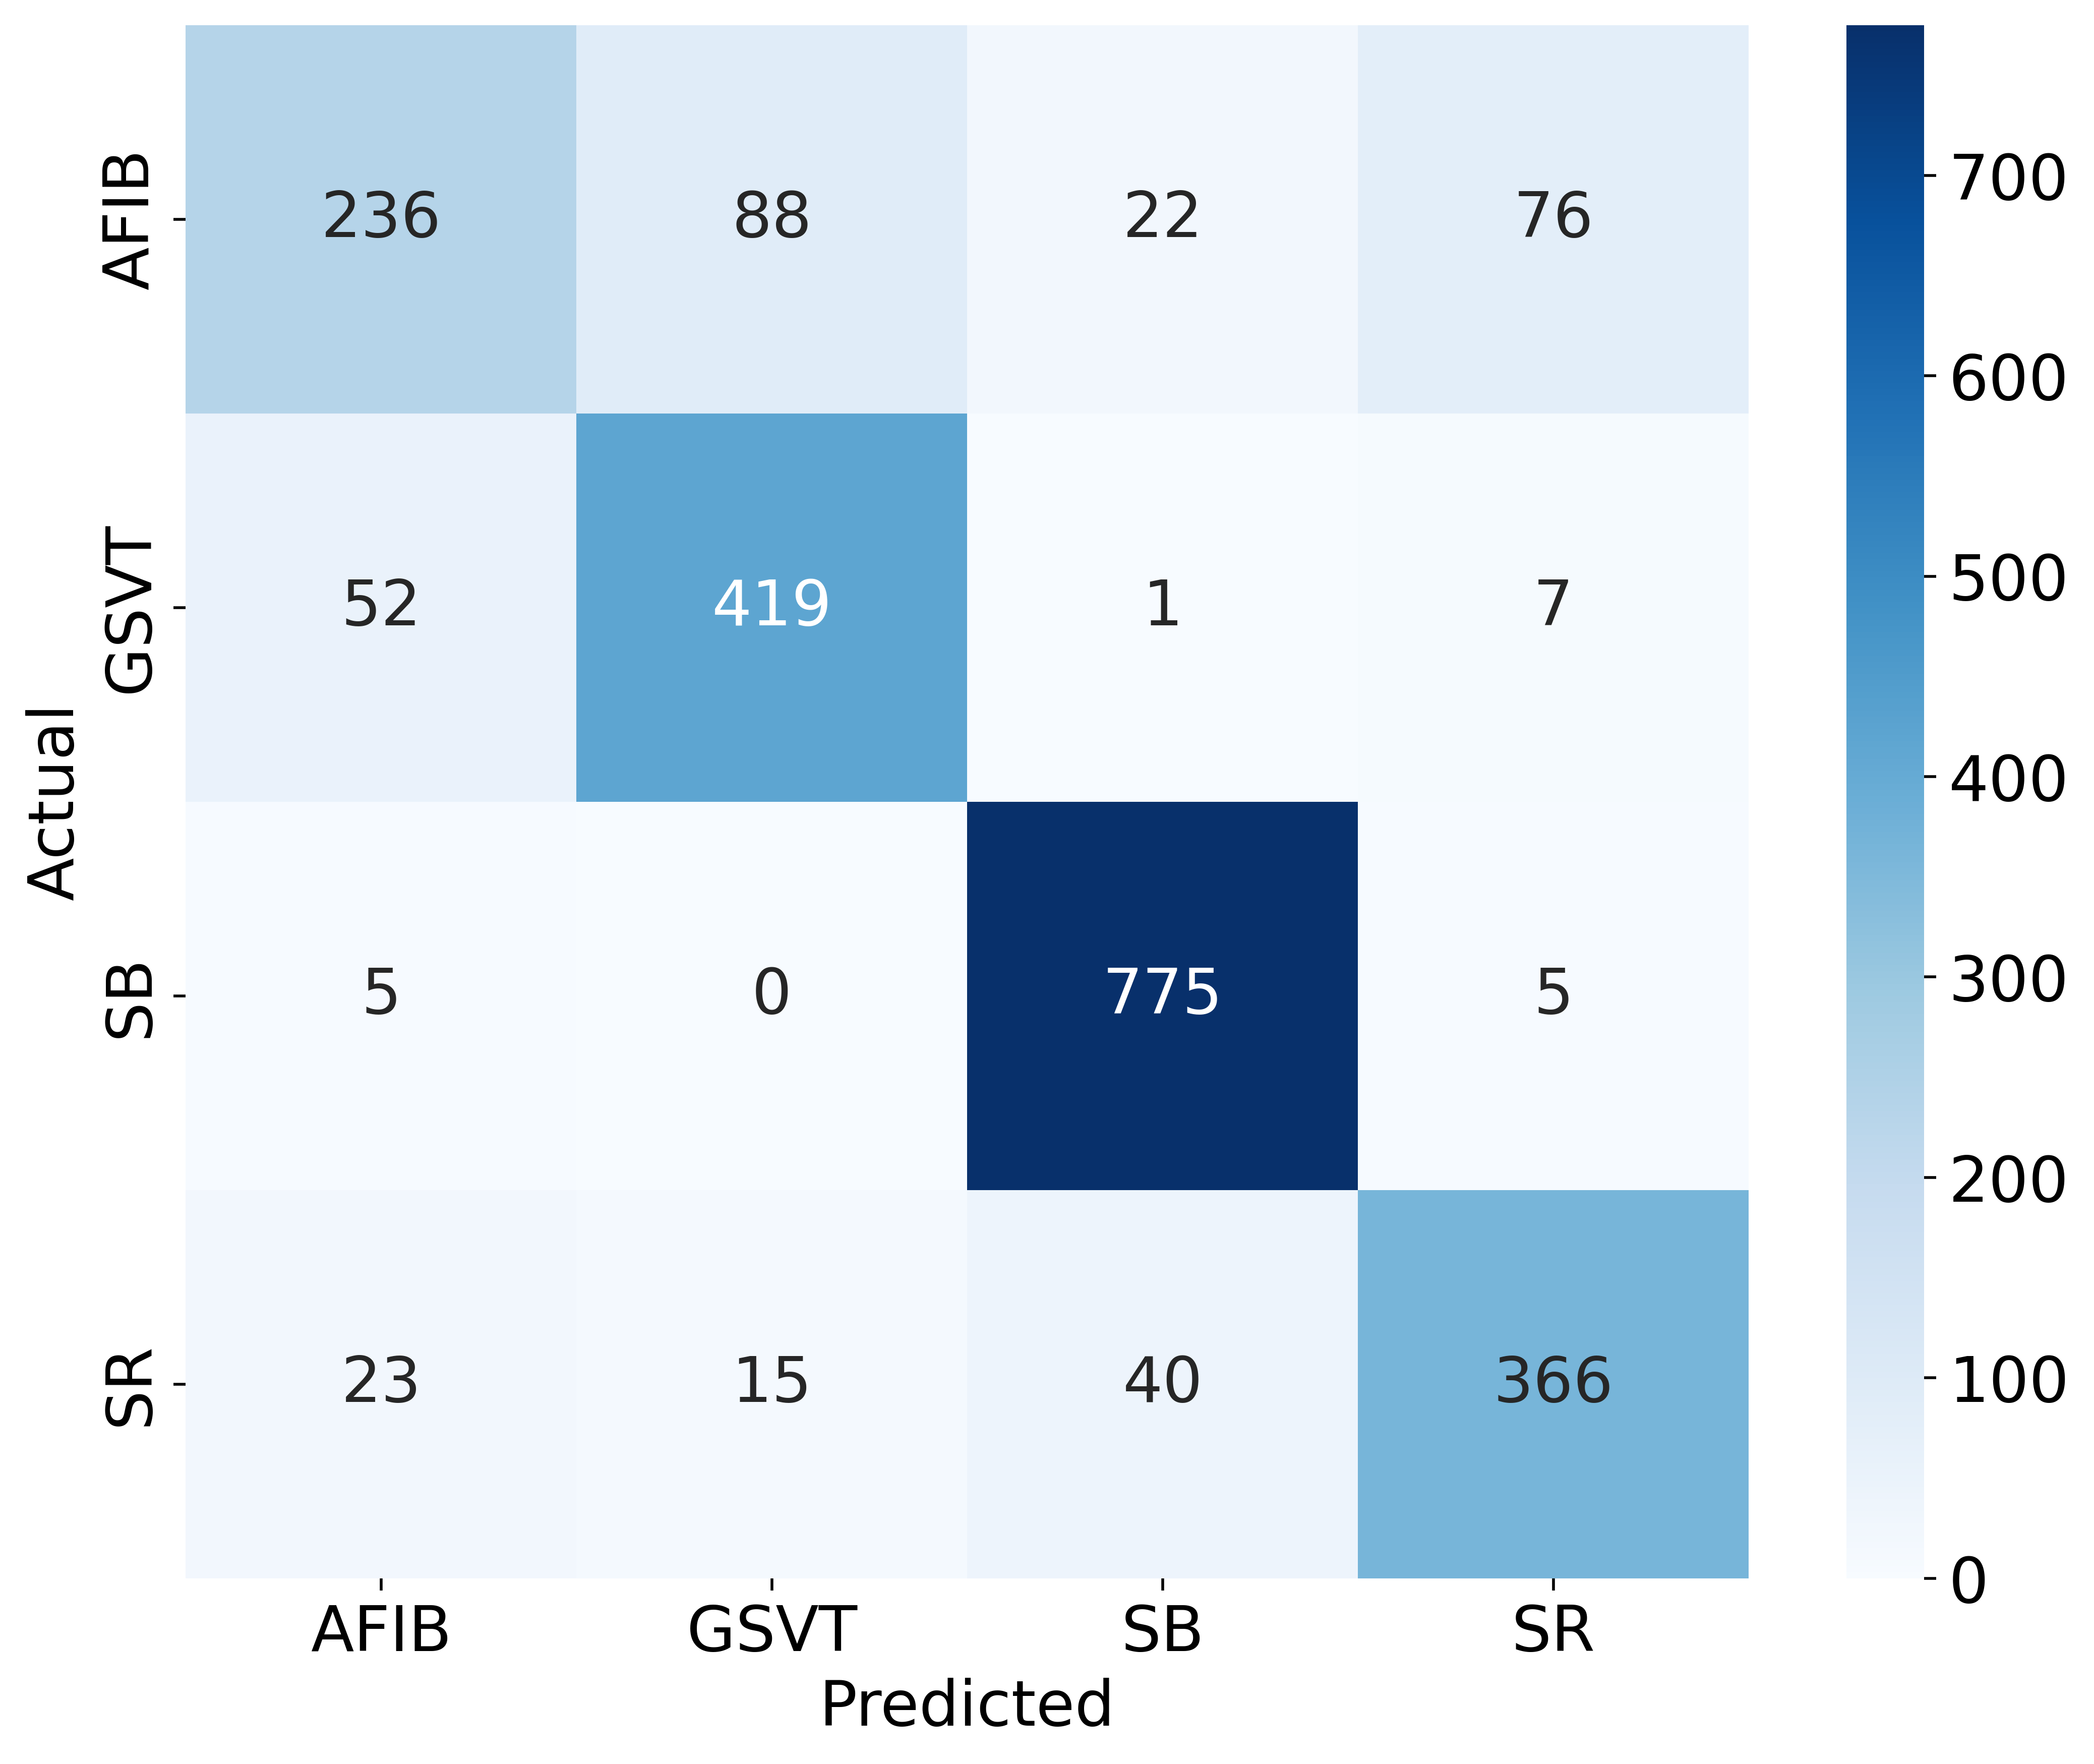

In [10]:
# Confusion Matrix Visualization
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(10, 8),dpi=500)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()